# Spam Classification


### About the dataset
Email Spam Classification is a kaggle dataset containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification.
- Dataset link- https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv?source=post_page-----aa44e7ff9b21--------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'..\data\email_spam_classification1.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

#### EDA and Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
duplicate_rows= df[df.duplicated()]
print("Number of Duplicate Rows are: ", duplicate_rows.shape)

Number of Duplicate Rows are:  (409, 2)


In [9]:
df.count()

v1    5572
v2    5572
dtype: int64

In [10]:
df=df.drop_duplicates(keep = 'first')
df.count()

v1    5163
v2    5163
dtype: int64

In [11]:
df.rename(columns={'v1':'Type', 'v2':'Mail_Text'}, inplace=True)

In [12]:
df['Char_Count']= df['Mail_Text'].apply(len)

In [13]:
df.tail()

,Type,Mail_Text,Char_Count
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will �_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

df['Type']=encoder.fit_transform(df['Type'])

In [15]:
#ham=0 and spam=1
df.head()

,Type,Mail_Text,Char_Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


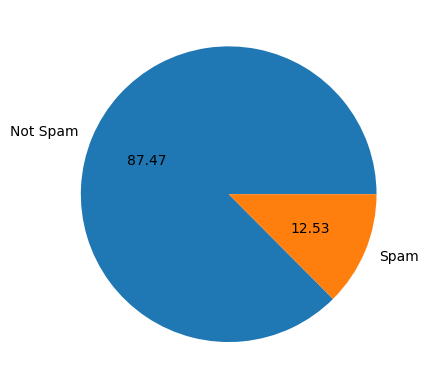

In [16]:
plt.pie(df['Type'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f")
plt.show()

In [17]:
# pip install nltk

In [18]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaysh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jaysh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:

#nltk.data.path.append(r'C:\Users\jaysh\All_Projects\Current_Projects\CustomEmail_A_Personalized_Email_Sender\customemail\Lib\site-packages\nltk_data')

In [20]:
# Breaking sentence into no. of words
df['Mail_Text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Mail_Text, Length: 5163, dtype: object

In [21]:
# counting no. of words used in mail-text
df['Word_Count']= df['Mail_Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,Type,Mail_Text,Char_Count,Word_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#counting no. of sentence in a mail
df['Sent_Count']= df['Mail_Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.tail()

,Type,Mail_Text,Char_Count,Word_Count,Sent_Count
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


In [25]:
df.describe()

,Type,Char_Count,Word_Count,Sent_Count
count,5163.000000,5163.000000,5163.000000,5163.000000
mean,0.125315,78.811156,18.444122,1.963974
std,0.331108,58.153491,13.327940,1.448008
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
#function for not spam messages
df[df['Type']==0].describe()

,Type,Char_Count,Word_Count,Sent_Count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.428919,17.123782,1.820195
std,0.0,56.356310,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [27]:
#function fro spam messages
df[df['Type']==1].describe()

,Type,Char_Count,Word_Count,Sent_Count
count,647.0,647.000000,647.000000,647.000000
mean,1.0,137.318393,27.659969,2.967543
std,0.0,30.096861,7.038065,1.490069
min,1.0,13.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


<Axes: xlabel='Char_Count', ylabel='Count'>

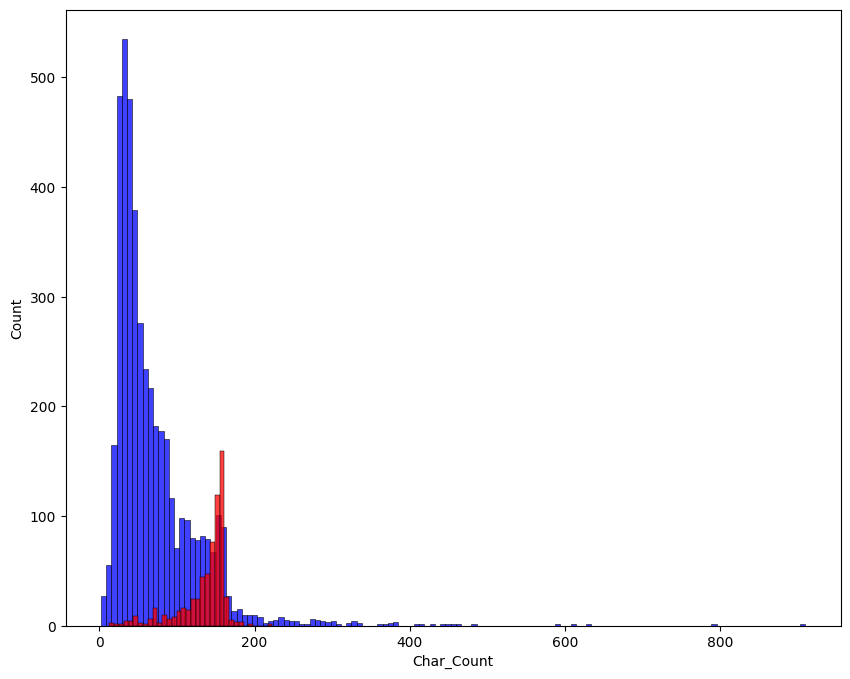

In [28]:
plt.figure(figsize= (10, 8))
sns.histplot(df[df['Type']==0]['Char_Count'], color='blue')
sns.histplot(df[df['Type']==1]['Char_Count'], color='red')

<Axes: xlabel='Word_Count', ylabel='Count'>

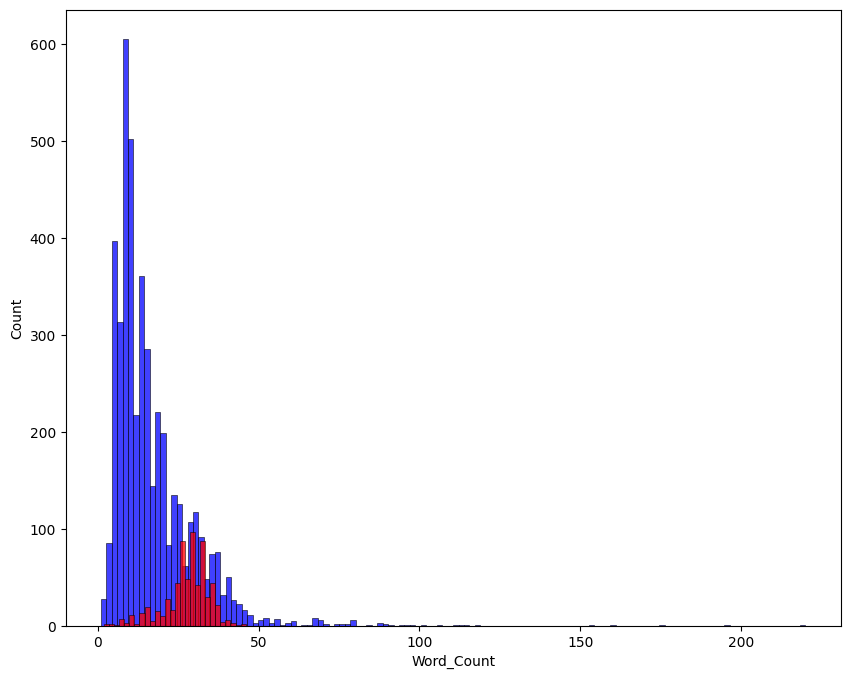

In [29]:
plt.figure(figsize=(10, 8))
sns.histplot(df[df['Type']==0]['Word_Count'], color='blue')
sns.histplot(df[df['Type']==1]['Word_Count'], color='red')

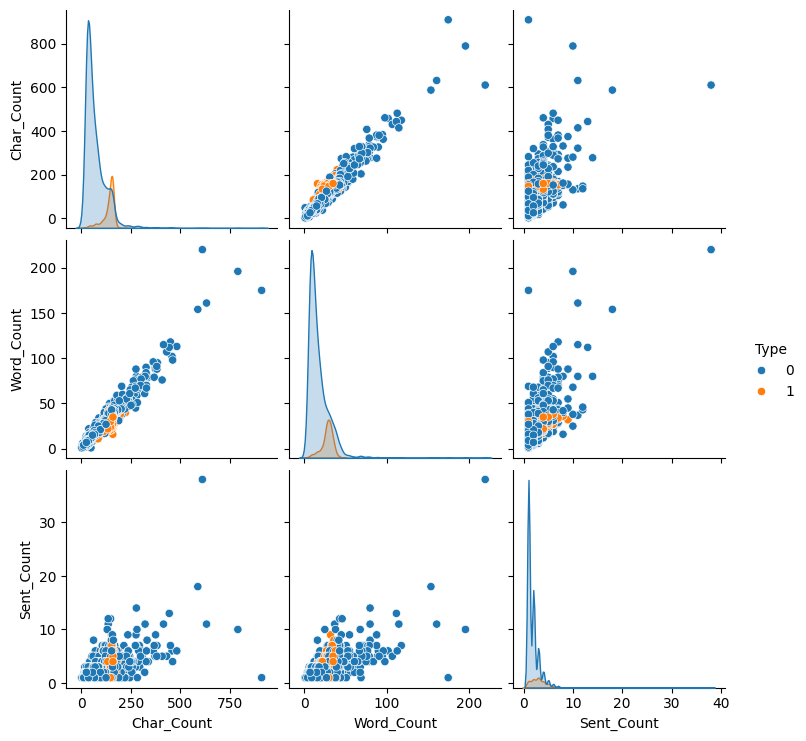

In [30]:
sns.pairplot(df, hue='Type')

In [31]:
columns= ['Type', 'Char_Count', 'Word_Count', 'Sent_Count']
numeric_data= df[columns]

<Axes: >

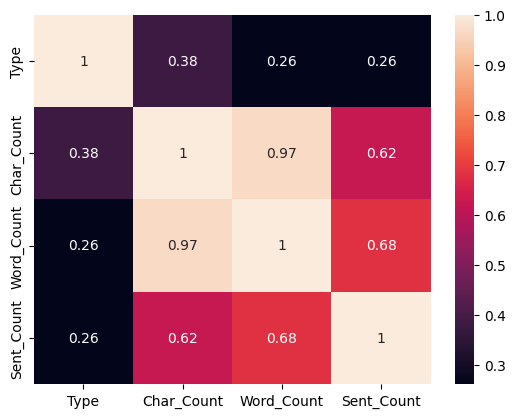

In [32]:
sns.heatmap(numeric_data.corr(), annot=True)

##### Text Preprosessing
- Lower Case Convertion
- Tokenization
- Removing special Characters
- Removing stopwords and punctuation
- Stemmimg

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaysh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('Roming')

'rome'

In [37]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)

    y=[]
    #removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text= y[:]
    y.clear()

    #removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text= y[:]
    y.clear()

    #stemming
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [38]:
transform_text('I will pick you up at 9, will that be ok with you?')

'pick 9 ok'

In [39]:
df['Transformed_Text']= df['Mail_Text'].apply(transform_text)

In [40]:
df.head()

,Type,Mail_Text,Char_Count,Word_Count,Sent_Count,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc= WordCloud(width=1500, height=800, min_font_size=10, background_color='white')

In [42]:
spam_wc= wc.generate(df[df['Type']==1]['Transformed_Text'].str.cat(sep=" "))

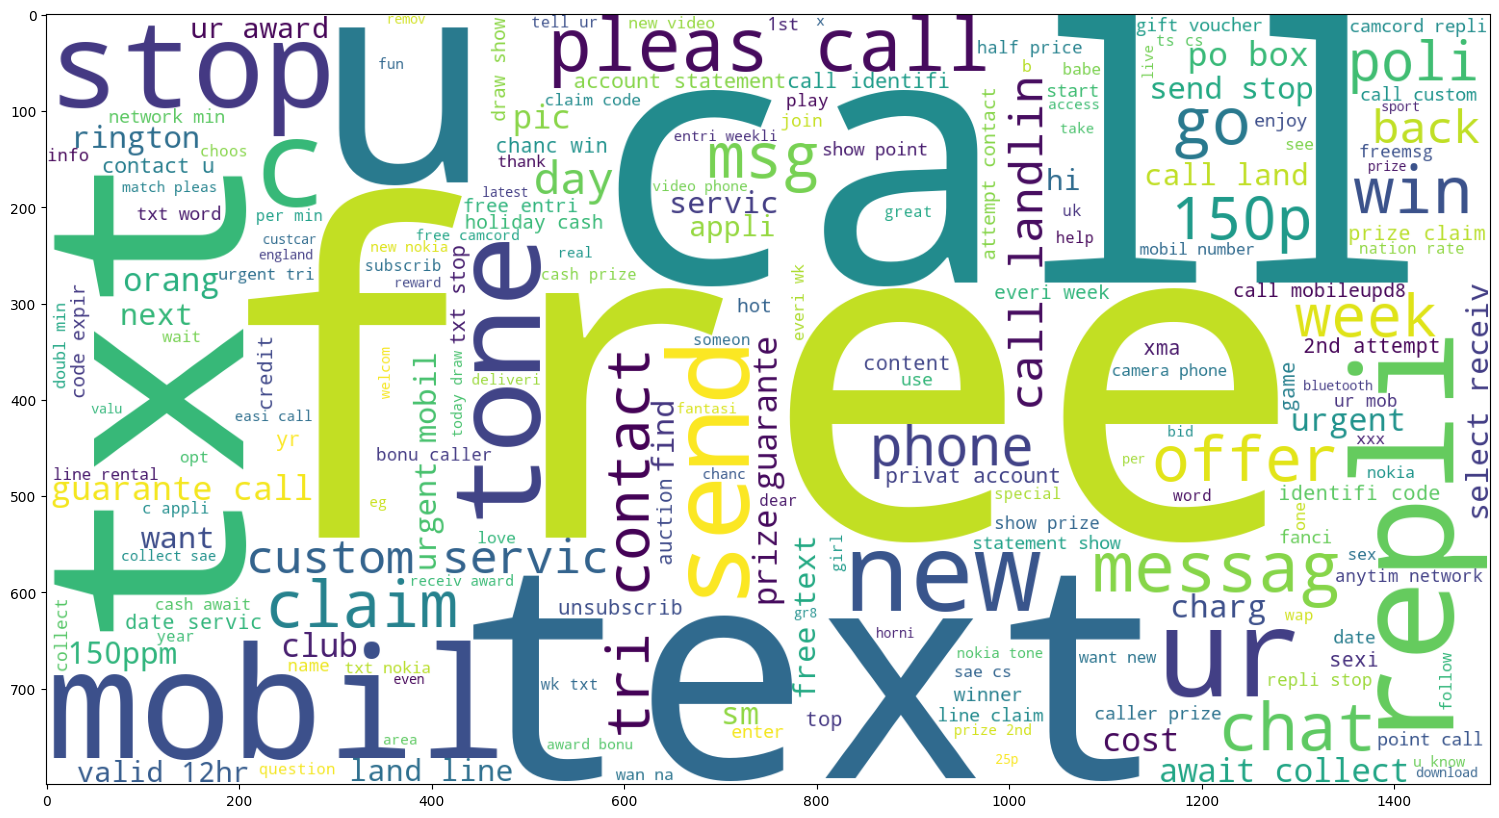

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(spam_wc)

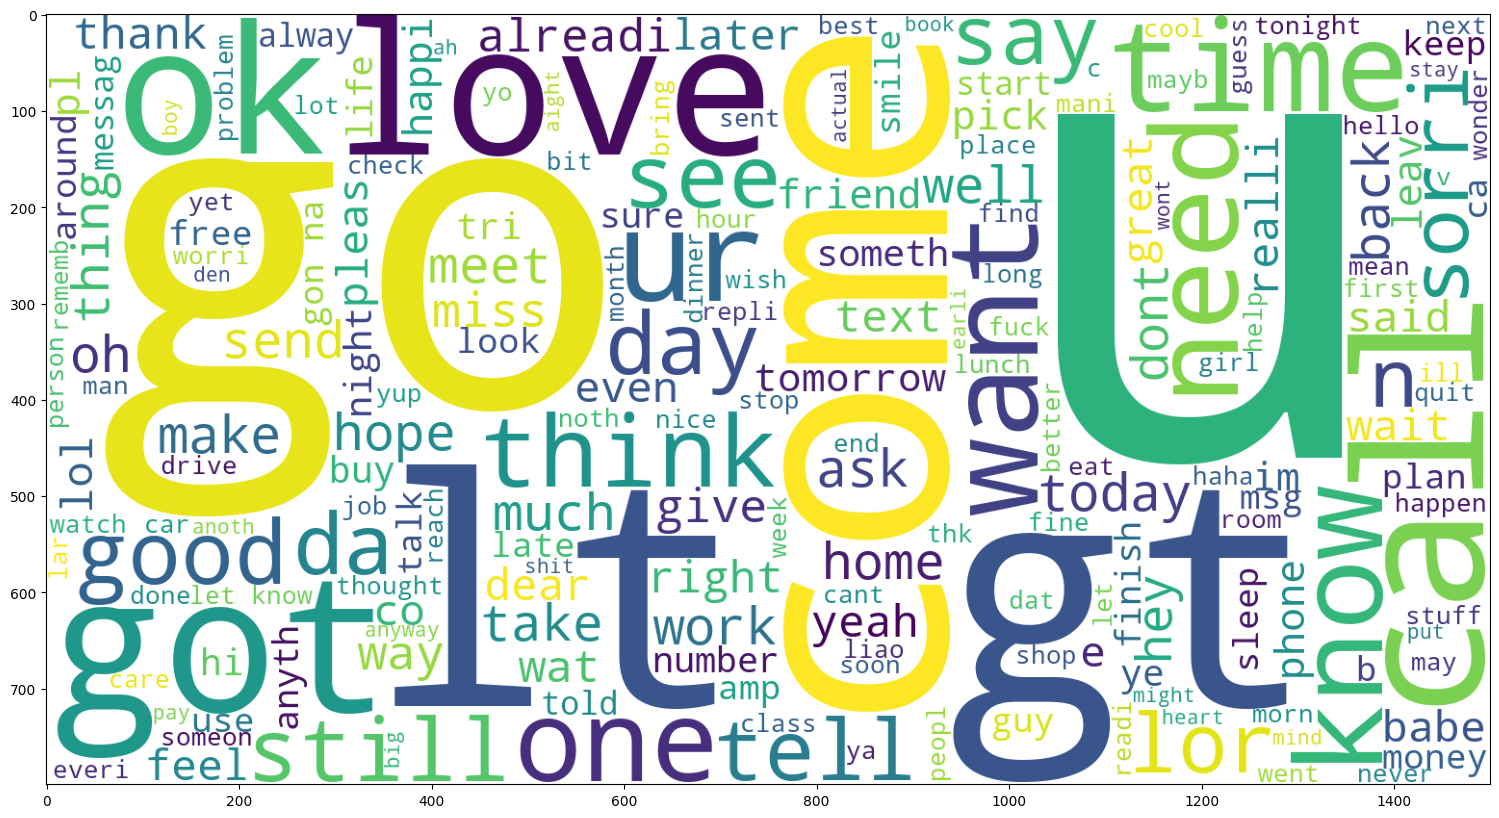

In [ ]:
not_spam_wc= wc.generate(df[df['Type']==0]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(20, 10))
plt.imshow(spam_wc)

In [45]:
spam_word = []
for msg in df[df['Type']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_word.append(word)

In [46]:
len(spam_word)

9861

In [ ]:
from collections import Counter
Counter(spam_word)

Counter({'call': 316,
         'free': 188,
         '2': 155,
         'txt': 140,
         'text': 122,
         'ur': 119,
         'u': 117,
         'mobil': 110,
         'stop': 104,
         'repli': 103,
         'claim': 97,
         '4': 97,
         'prize': 80,
         'get': 73,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 59,
         'urgent': 57,
         'nokia': 55,
         'award': 55,
         'contact': 54,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 46,
         'c': 45,
         'min': 45,
         'collect': 44,
         'messag': 42,
         'guarante': 41,
         'per': 41,
         'custom': 40,
         'chat': 37,
         'tri': 36,
         'msg': 35,
         'number': 35,
         'cs': 35,
         'draw': 34,
         'today': 33,
         'offer': 33,
         'line': 33,
         'show': 32,
         'go': 32,
         'want': 31,
         'receiv': 3

In [48]:
df1= pd.DataFrame(Counter(spam_word).most_common(50), columns=['Word', 'Frequency'])
df1.head()

,Word,Frequency
0,call,316
1,free,188
2,2,155
3,txt,140
4,text,122


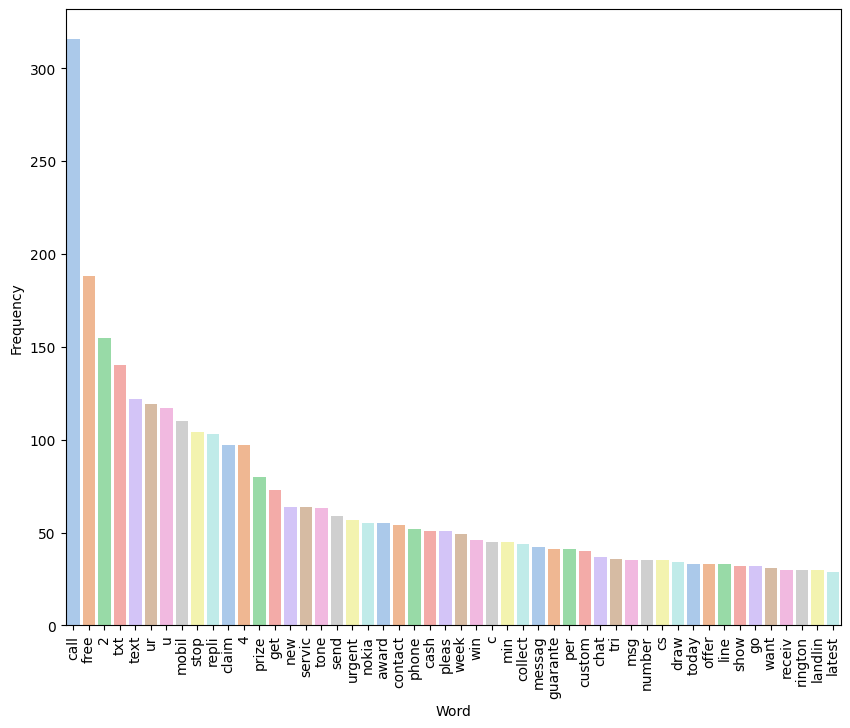

In [49]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=df1, hue= 'Word', palette='pastel', legend=False)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
not_spam_word = []
for msg in df[df['Type']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        not_spam_word.append(word)

In [51]:
len(not_spam_word)

35306

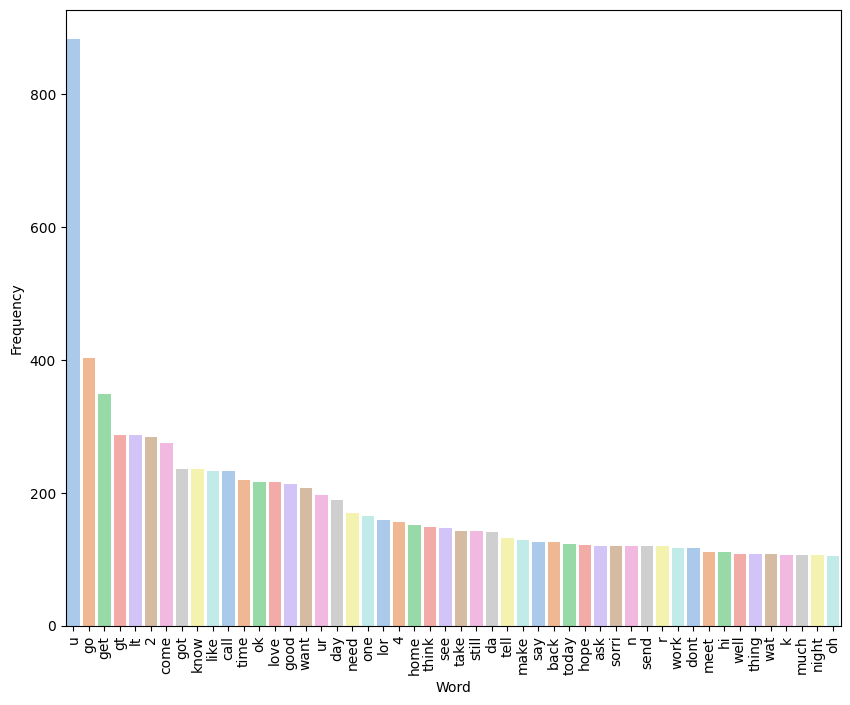

In [52]:
df2= pd.DataFrame(Counter(not_spam_word).most_common(50), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=df2, hue= 'Word', palette='pastel', legend=False)
plt.xticks(rotation='vertical')
plt.show()

### Model

In [53]:
df.head()

,Type,Mail_Text,Char_Count,Word_Count,Sent_Count,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import pickle

In [55]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Transformed_Text']).toarray()
y = df['Type'].values


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
model= MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [58]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [59]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.9735
Precision: 0.9929
